In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from tqdm import tqdm

In [2]:
Nt = 11
Nx = 6
Ny = 6

x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Nx)
t = np.linspace(0,1,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

k = 0.075

lambda_ = (k*deltat)/deltax**2
mu_ = (k*deltat)/deltay**2

print(lambda_,mu_)
print(deltax,deltay,deltat)

0.18749999999999994 0.18749999999999994
0.2 0.2 0.1


In [3]:
def Ti(x,y):
    X, Y = np.meshgrid(x, y)
    return np.sin(np.pi*(X+Y))

In [4]:
def h1(t):
    return np.exp(-2 * np.pi**2 * t) * np.sin(np.pi * y)

def h2(t):
    return np.exp(-2 * np.pi**2 * t) * np.sin(np.pi * x)

def h3(t):
    return np.exp(-2 * np.pi**2 * t) * np.sin(np.pi * (1 + y))

def h4(t):
    return np.exp(-2 * np.pi**2 * t) * np.sin(np.pi * (1 + x))

In [5]:
def InitT():
    
    T = np.zeros((Nt,Nx,Ny))

    T[0,:,:] = Ti(x,y)
    
    return T

In [6]:
T = InitT()


In [7]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                T[:, 0, :] = h1(l)
                T[:, :, 0] = h2(l)
                T[:,-1,: ] = h3(l)
                T[:,:,-1 ] = h4(l)
                T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])
                

In [8]:
GetSolution()

100%|██████████| 10/10 [00:00<00:00, 1176.99it/s]


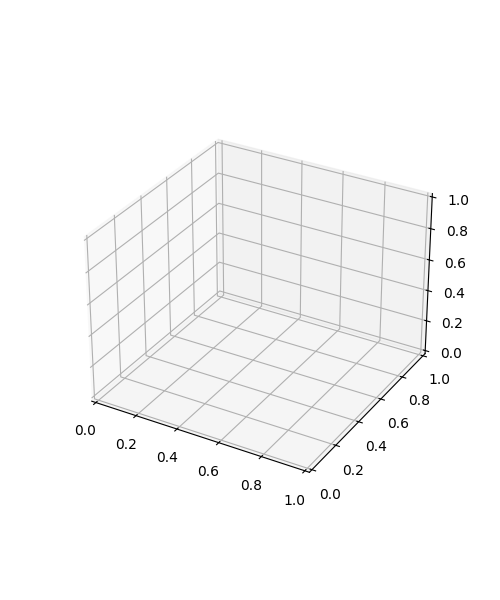

In [9]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d(0,2)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)